In [1]:
import numpy as np, pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## make labels of strains
from matplotlib import rc
xl280al = 'XL280'+r'$\alpha$'#+'SS'
xl280_label = 'XL280' +r'$\bf{a}$'
_431_label = '431'+r'$\mathrm{\alpha}$'

In [3]:
## Set gene paths
## For XL280 vs 431
xl280_cfu1_path ='/home/croth/crypto-QTL-paper/DATA/GENOTYPE/CNG02270.csv'

## For Ftc555-1 and Bt22
ftc555_cuf1_path = '/home/croth/Documents/DirtyDozen/GENES/FTC555/CNAG_07724-t26_1.csv.gz' 
bt22_cuf1_path = '/home/croth/Documents/DirtyDozen/GENES/BT22/CNAG_07724-t26_1.csv.gz'

In [4]:
## Bring in CUF1 for XL280 and 431
cng02270 = pd.read_csv(xl280_cfu1_path,index_col=0)

## translate each strain
xl280 = Seq(''.join(cng02270[(cng02270.Seq==1)].Ref.tolist())).translate()
_431 = Seq(''.join(cng02270[(cng02270.Seq==1)].Alt.tolist())).translate()

## ## Add a column for the amino acids
cng02270['REFAA'] = -1
cng02270['ALTAA'] = -1

## Append in groups of each amino acid
cng02270.loc[(cng02270.Seq==1),'REFAA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                            for a in list(xl280)])
## For each strain
cng02270.loc[(cng02270.Seq==1),'ALTAA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                             for a in list(_431)])
## show head 
cng02270.head()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,REFAA,ALTAA
0,646416,646416,A,A,0.0,1,5,CNG02270,-1,-1
1,646417,646417,G,G,0.0,1,5,CNG02270,-1,-1
2,646418,646418,C,C,0.0,1,5,CNG02270,-1,-1
3,646419,646419,A,A,0.0,1,5,CNG02270,-1,-1
4,646420,646420,A,A,0.0,1,5,CNG02270,-1,-1


In [5]:
## What is the length of each strains CUF1?
len(xl280),len(_431)

(1050, 1050)

In [6]:
## How many stop codons in each strain?
list(xl280).count("*"),list(_431).count('*')

(1, 1)

In [7]:
## where are they strains different?
for i,r in enumerate(xl280):
    if r != _431[i]:
        print(i,r,_431[i])

703 N S
847 I M
1006 G S


In [8]:
## Take where the strians are variant
cuf1_vars = cng02270[(cng02270.Var==1)]

## Further slice where non-sysnomous
cuf1_vars_ns = cuf1_vars[(cuf1_vars.REFAA!=cuf1_vars.ALTAA)]

## view dataframe
cuf1_vars

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,REFAA,ALTAA
1091,647507,647508,T,C,1.0,1,1,CNG02270,D,D
1577,647993,647994,G,A,1.0,1,1,CNG02270,S,S
2581,648997,648998,A,G,1.0,1,1,CNG02270,N,S
2738,649154,649155,T,C,1.0,1,1,CNG02270,D,D
3014,649430,649431,A,G,1.0,1,1,CNG02270,I,M
3489,649905,649906,G,A,1.0,1,1,CNG02270,G,S


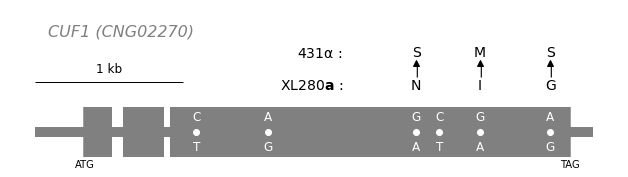

In [9]:
## Make a gene model for the C. deneoformans CUF1
fig,ax = plt.subplots(1,1,figsize=(11,3))

plt.hlines(0,cng02270.Start.min(),cng02270.End.max(),
           color='grey',linewidth=10);

[plt.vlines(j.Start,-0.02,0.02,color='grey') 
 for i,j in cng02270[(cng02270.Seq==1)].iterrows()];

## set y-axis limits
plt.ylim(-0.03,.1)

## Plot the SNPs and annotate them
for k,(i,j) in enumerate(cuf1_vars.iterrows()):
    
    plt.text(j.Start,0.0,'%s\n \n%s'%(j.Alt,j.Ref),
             fontsize=12,va='center',ha='center',color='w')
    plt.plot(j.Start,0,'wo')
    
## Annotate the residuals
for k,(i,j) in enumerate(cuf1_vars_ns.iterrows()):
    
    plt.text(j.Start,0.05,'%s\n|\n%s'%(j.ALTAA,j.REFAA),
             fontsize=14,va='center',ha='center',color='k')
    plt.plot(j.Start,0.055,'k^')

## Annotate the strain names
plt.text(648500,0.05,s='%s :\n\n%s :'%(_431_label,xl280_label),
                fontsize=14,va='center',ha='right',color='k')

## Name the gene
plt.text(647000,0.08,'CUF1 (CNG02270)',fontstyle='italic',
         fontsize=16,color='grey',va='center',ha='center')

## Add scale bar
plt.hlines(0.04,cng02270.Start.min(),
           cng02270.Start.min()+1000,
           color='k',linewidth=1)
plt.text(cng02270.Start.min()+500,0.05,
         '1 kb',va='center',ha='center',
        fontsize=12)

## Annotate start and stop codons
plt.text(cng02270[(cng02270.Seq==1)].Start.min(),
        -0.03,s='ATG',ha='center',va='bottom')

plt.text(cng02270[(cng02270.Seq==1)].Start.max(),
        -0.03,s='TAG',ha='center',va='bottom')

## Add xlabel
#plt.xlabel('Chromosome 7 Coordinates',fontsize=12);

## Remove axis and save
plt.axis('off');
plt.savefig('../../FIGURES/CUF1_XL280x431.png',
           dpi=200,bbox_inches='tight');

In [10]:
## Bring in CUF1 for the Ftc555-1 strain
## and rename orf codes and replace zero
## reverse and add start positons
ftc555_cuf1 = pd.read_csv(ftc555_cuf1_path,index_col=0)[::-1]
ftc555_cuf1['Seq'] = ftc555_cuf1.Type.replace(0,1)
ftc555_cuf1['Start'] = np.abs(ftc555_cuf1.Pos - ftc555_cuf1.Pos.max())+1
ftc555_cuf1['End'] = ftc555_cuf1.Start.values+1

## Add in complitment (as we already reversed these above)
## Make copys of ref
ftc555_cuf1['Refc'] = ftc555_cuf1.Ref
ftc555_cuf1['Altc'] = ftc555_cuf1.Alt

## Make a variant column
ftc555_cuf1['Var']= 1 - (ftc555_cuf1['Ref'] == ftc555_cuf1['Alt']).apply(int)

## Rewrite compliment
ftc555_cuf1['Ref'] = list(Seq(''.join(ftc555_cuf1.Refc.tolist())).complement())
ftc555_cuf1['Alt'] = list(Seq(''.join(ftc555_cuf1.Altc.tolist())).complement())

## translate each strain
h991 = Seq(''.join(ftc555_cuf1[(ftc555_cuf1.Seq==1)].Ref.tolist())).translate()
ftc555 = Seq(''.join(ftc555_cuf1[(ftc555_cuf1.Seq==1)].Alt.tolist())).translate()

## ## Add a column for the amino acids
ftc555_cuf1['H991AA'] = -1
ftc555_cuf1['FTC555AA'] = -1

## Append in groups of each amino acid
ftc555_cuf1.loc[(ftc555_cuf1.Seq==1),'H991AA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                            for a in list(h991)])
## For each strain
ftc555_cuf1.loc[(ftc555_cuf1.Seq==1),'FTC555AA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                             for a in list(ftc555)])
## show head 
ftc555_cuf1.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Seq,Start,End,Refc,Altc,Var,H991AA,FTC555AA
3838,725406,G,G,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,1,2,C,C,0,-1,-1
3837,725405,C,C,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,2,3,G,G,0,-1,-1
3836,725404,C,C,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,3,4,G,G,0,-1,-1
3835,725403,A,A,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,4,5,T,T,0,-1,-1
3834,725402,G,G,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,5,6,C,C,0,-1,-1


In [11]:
## Take where the strians are variant
cuf1_vars_f = ftc555_cuf1[(ftc555_cuf1.Var==1)]

## Further slice where non-sysnomous
cuf1_vars_ns_f = cuf1_vars_f[(cuf1_vars_f.FTC555AA!=cuf1_vars_f.H991AA)]

## view dataframes shapes
cuf1_vars_f.shape[0], cuf1_vars_ns_f.shape[0]

(14, 5)

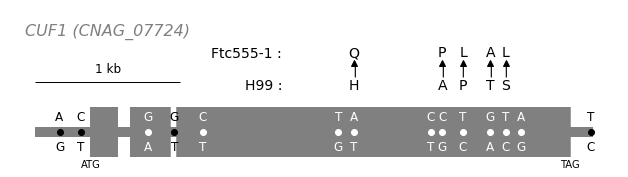

In [12]:
## Make a gene model for the C. neoformans CUF1 with Ftc555-1
fig,ax = plt.subplots(1,1,figsize=(11,3))

plt.hlines(0,ftc555_cuf1.Start.min(),ftc555_cuf1.End.max(),
           color='grey',linewidth=10);

[plt.vlines(j.Start,-0.02,0.02,color='grey') 
 for i,j in ftc555_cuf1[(ftc555_cuf1.Seq==1)].iterrows()];

## set y-axis limits
plt.ylim(-0.03,.1)

## Plot the SNPs and annotate them
for k,(i,j) in enumerate(cuf1_vars_f.iterrows()):
    
    plt.text(j.Start,0.0,'%s\n \n%s'%(j.Alt,j.Ref),
             fontsize=12,va='center',ha='center',
             color='w' if j.Seq==1 else 'k')
    plt.plot(j.Start,0,'o',color='w' if j.Seq==1 else 'k')
    
## Annotate the residuals
for k,(i,j) in enumerate(cuf1_vars_ns_f.iterrows()):
    
    plt.text(j.Start,0.05,'%s\n|\n%s'%(j.FTC555AA,j.H991AA),
             fontsize=14,va='center',ha='center',color='k')
    plt.plot(j.Start,0.055,'k^')

## Annotate the strain names
plt.text(1700,0.05,s='%s :\n\n%s :'%('Ftc555-1','H99'),
                fontsize=14,va='center',ha='right',color='k')

## Name the gene
plt.text(500,0.08,'CUF1 (CNAG_07724)',fontstyle='italic',
         fontsize=16,color='grey',va='center',ha='center')

## Add scale bar
plt.hlines(0.04,ftc555_cuf1.Start.min(),
           ftc555_cuf1.Start.min()+1000,
           color='k',linewidth=1)
plt.text(ftc555_cuf1.Start.min()+500,0.05,
         '1 kb',va='center',ha='center',
        fontsize=12)

## Annotate start and stop codons
plt.text(ftc555_cuf1[(ftc555_cuf1.Seq==1)].Start.min(),
        -0.03,s='ATG',ha='center',va='bottom')

plt.text(ftc555_cuf1[(ftc555_cuf1.Seq==1)].Start.max(),
        -0.03,s='TAG',ha='center',va='bottom')

## Add xlabel
#plt.xlabel('Chromosome 7 Coordinates',fontsize=12);

## Remove axis and save
plt.axis('off');
plt.savefig('../../FIGURES/CUF1_Ftc555xH99.png',
           dpi=200,bbox_inches='tight');

In [13]:
## Bring in CUF1 for the Bt22 strain
## and rename orf codes and replace zero
## reverse and add start positons
bt22_cuf1 = pd.read_csv(bt22_cuf1_path,index_col=0)[::-1]
bt22_cuf1['Seq'] = bt22_cuf1.Type.replace(0,1)
bt22_cuf1['Start'] = np.abs(bt22_cuf1.Pos - bt22_cuf1.Pos.max())+1
bt22_cuf1['End'] = bt22_cuf1.Start.values +1


## Add in complitment (as we already reversed these above)
## Make copys of ref
bt22_cuf1['Refc'] = bt22_cuf1.Ref
bt22_cuf1['Altc'] = bt22_cuf1.Alt

## Make a variant column
bt22_cuf1['Var'] = 1- (bt22_cuf1['Ref'] == bt22_cuf1['Alt']).apply(int)

## Rewrite compliment
bt22_cuf1['Ref'] = list(Seq(''.join(bt22_cuf1.Refc.tolist())).complement())
bt22_cuf1['Alt'] = list(Seq(''.join(bt22_cuf1.Altc.tolist())).complement())

## translate each strain
h992 = Seq(''.join(bt22_cuf1[(bt22_cuf1.Seq==1)].Ref.tolist())).translate()
bt22 = Seq(''.join(bt22_cuf1[(bt22_cuf1.Seq==1)].Alt.tolist())).translate()

## ## Add a column for the amino acids
bt22_cuf1['H992AA'] = -1
bt22_cuf1['BT22AA'] = -1

## Append in groups of each amino acid
bt22_cuf1.loc[(bt22_cuf1.Seq==1),'H992AA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                            for a in list(h992)])
## For each strain
bt22_cuf1.loc[(bt22_cuf1.Seq==1),'BT22AA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                             for a in list(bt22)])
## show head 
bt22_cuf1.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Seq,Start,End,Refc,Altc,Var,H992AA,BT22AA
3838,725406,G,G,0,-1,5,-1,CNAG_07724-t26_1,BT22,5,1,2,C,C,0,-1,-1
3837,725405,C,C,0,-1,5,-1,CNAG_07724-t26_1,BT22,5,2,3,G,G,0,-1,-1
3836,725404,C,C,0,-1,5,-1,CNAG_07724-t26_1,BT22,5,3,4,G,G,0,-1,-1
3835,725403,A,A,0,-1,5,-1,CNAG_07724-t26_1,BT22,5,4,5,T,T,0,-1,-1
3834,725402,G,G,0,-1,5,-1,CNAG_07724-t26_1,BT22,5,5,6,C,C,0,-1,-1


In [14]:
## Check references
for i,j in enumerate(h992):
    if j != h991[i]:
        print(j)

In [15]:
## Take where the strians are variant
cuf1_vars_b = bt22_cuf1[(bt22_cuf1.Var==1)]

## Further slice where non-sysnomous
cuf1_vars_ns_b = cuf1_vars_b[(cuf1_vars_b.BT22AA!=cuf1_vars_b.H992AA)]

## view dataframes shapes
cuf1_vars_b.shape[0], cuf1_vars_ns_b.shape[0]

(13, 4)

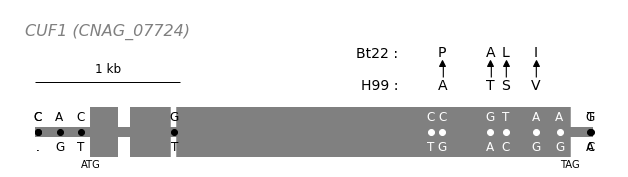

In [16]:
## Make a gene model for the C. neoformans CUF1 with Ftc555-1
fig,ax = plt.subplots(1,1,figsize=(11,3))

plt.hlines(0,bt22_cuf1.Start.min(),bt22_cuf1.End.max(),
           color='grey',linewidth=10);

[plt.vlines(j.Start,-0.02,0.02,color='grey') 
 for i,j in bt22_cuf1[(bt22_cuf1.Seq==1)].iterrows()];

## set y-axis limits
plt.ylim(-0.03,.1)

## Plot the SNPs and annotate them
for k,(i,j) in enumerate(cuf1_vars_b.iterrows()):
    
    plt.text(j.Start,0.0,'%s\n \n%s'%(j.Alt,j.Ref),
             fontsize=12,va='center',ha='center',
             color='w' if j.Seq==1 else 'k')
    plt.plot(j.Start,0,'o',color='w' if j.Seq==1 else 'k')
    
## Annotate the residuals
for k,(i,j) in enumerate(cuf1_vars_ns_b.iterrows()):
    
    plt.text(j.Start,0.05,'%s\n|\n%s'%(j.BT22AA,j.H992AA),
             fontsize=14,va='center',ha='center',color='k')
    plt.plot(j.Start,0.055,'k^')

## Annotate the strain names
plt.text(2500,0.05,s='%s :\n\n%s :'%('Bt22','H99'),
                fontsize=14,va='center',ha='right',color='k')

## Name the gene
plt.text(500,0.08,'CUF1 (CNAG_07724)',fontstyle='italic',
         fontsize=16,color='grey',va='center',ha='center')

## Add scale bar
plt.hlines(0.04,bt22_cuf1.Start.min(),
           bt22_cuf1.Start.min()+1000,
           color='k',linewidth=1)
plt.text(bt22_cuf1.Start.min()+500,0.05,
         '1 kb',va='center',ha='center',
        fontsize=12)

## Annotate start and stop codons
plt.text(bt22_cuf1[(bt22_cuf1.Seq==1)].Start.min(),
        -0.03,s='ATG',ha='center',va='bottom')

plt.text(bt22_cuf1[(bt22_cuf1.Seq==1)].Start.max(),
        -0.03,s='TAG',ha='center',va='bottom')

## Add xlabel
#plt.xlabel('Chromosome 7 Coordinates',fontsize=12);

## Remove axis and save
plt.axis('off');
plt.savefig('../../FIGURES/CUF1_Bt22xH99.png',
           dpi=200,bbox_inches='tight');

In [32]:
## Which dataframe is larger?
ftc555_cuf1.shape[0],bt22_cuf1.shape[0]

(3839, 3841)

,Pos,Strand,Phase,Seq,Start,End,Refc,Altc,Var,BT22AA,Ftc555-1,Bt22,H99,H99AA,FTC555AA,Nonsyn
21,725386,-1,-1,5,21,22,.,G,0,-1,C,C,.,-1,-1,0
22,725386,-1,-1,5,21,22,.,G,0,-1,C,C,.,-1,-1,0


In [104]:
## make a combined dataframe
ftc555_cuf1['Ftc555-1'] = ftc555_cuf1.Alt ## Rename the alt allele for Ftc555-1
combined = bt22_cuf1.merge(ftc555_cuf1[['Start','Ftc555-1']]) ## Merge to Bt22 dataframe
#combined.index = combined.Pos ## Make position index
combined['Bt22'] = combined.Alt ## rename the alt allele 
combined['H99'] = combined.Ref ## rename the ref allele
combined['H99AA'] = combined.H992AA ## rename H99 amino acid column
combined['FTC555AA'] = -1 ## Set the Ftc555 amino acid column
combined['Var'] = 0

combined.reset_index(drop=True,inplace=True)

combined.loc[combined[(combined.H99=='.')].index,'Ftc555-1'] = '.'

## Drop duplicates
combined.drop(['Ref','Alt','Isvar',
               'Gene','Sample','Type','H992AA'],
              axis=1,inplace=True)

## write the ftc555 aminoacids
ftc555 = Seq(''.join(combined[(combined.Seq==1)][['Start','Ftc555-1']
                    ].drop_duplicates()['Ftc555-1'].tolist())).translate()


## For the Ftc555 strain put AA into columns
combined.loc[(combined.Seq==1),'FTC555AA'] = np.concatenate(
                                            [np.repeat(a,3) 
                                             for a in list(ftc555)])

## find variants between Bt22 and FTC555
varix = combined[(combined.Bt22!=combined['Ftc555-1'])].index.tolist()
combined.loc[varix,'Var'] = 1

## Make column for non-syn index
combined['Nonsyn'] = 0
nonsynix = combined[(combined.BT22AA != combined.FTC555AA)].index.tolist()
combined.loc[nonsynix,'Nonsyn'] = 1

## view head
combined.head()

,Pos,Strand,Phase,Seq,Start,End,Refc,Altc,Var,BT22AA,Ftc555-1,Bt22,H99,H99AA,FTC555AA,Nonsyn
0,725406,-1,-1,5,1,2,C,C,0,-1,G,G,G,-1,-1,0
1,725405,-1,-1,5,2,3,G,G,0,-1,C,C,C,-1,-1,0
2,725404,-1,-1,5,3,4,G,G,0,-1,C,C,C,-1,-1,0
3,725403,-1,-1,5,4,5,T,T,0,-1,A,A,A,-1,-1,0
4,725402,-1,-1,5,5,6,C,C,0,-1,G,G,G,-1,-1,0


In [105]:
## find the nonsynonmous changes?
combined[(combined.Nonsyn==1) & (combined.Var==1)]

,Pos,Strand,Phase,Seq,Start,End,Refc,Altc,Var,BT22AA,Ftc555-1,Bt22,H99,H99AA,FTC555AA,Nonsyn
2197,723211,-1,2,1,2196,2197,A,A,1,H,A,T,T,H,Q,1
2946,722462,-1,2,1,2945,2946,G,G,1,P,T,C,C,P,L,1
3446,721962,-1,2,1,3445,3446,C,T,1,I,G,A,G,V,V,1


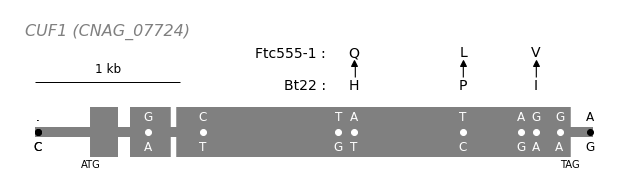

In [106]:
## Make a gene model for the C. neoformans CUF1 with Ftc555-1
fig,ax = plt.subplots(1,1,figsize=(11,3))

plt.hlines(0,combined.Start.min(),combined.End.max(),
           color='grey',linewidth=10);

[plt.vlines(j.Start,-0.02,0.02,color='grey') 
 for i,j in combined[(combined.Seq==1)].iterrows()];

## set y-axis limits
plt.ylim(-0.03,.1)

## Plot the SNPs and annotate them
for k,(i,j) in enumerate(combined[(combined.Var==1)].iterrows()):
    
    plt.text(j.Start,0.0,'%s\n \n%s'%(j['Ftc555-1'],j.Bt22),
             fontsize=12,va='center',ha='center',
             color='w' if j.Seq==1 else 'k')
    plt.plot(j.Start,0,'o',color='w' if j.Seq==1 else 'k')
    
## Annotate the residuals
for k,(i,j) in enumerate(combined[(combined.Var==1) & 
                                  (combined.Nonsyn==1)].iterrows()):
    
    plt.text(j.Start,0.05,'%s\n|\n%s'%(j.FTC555AA,j.BT22AA),
             fontsize=14,va='center',ha='center',color='k')
    plt.plot(j.Start,0.055,'k^')

## Annotate the strain names
plt.text(2000,0.05,s='%s :\n\n%s :'%('Ftc555-1','Bt22'),
                fontsize=14,va='center',ha='right',color='k')

## Name the gene
plt.text(500,0.08,'CUF1 (CNAG_07724)',fontstyle='italic',
         fontsize=16,color='grey',va='center',ha='center')

## Add scale bar
plt.hlines(0.04,combined.Start.min(),
           combined.Start.min()+1000,
           color='k',linewidth=1)
plt.text(combined.Start.min()+500,0.05,
         '1 kb',va='center',ha='center',
        fontsize=12)

## Annotate start and stop codons
plt.text(combined[(combined.Seq==1)].Start.min(),
        -0.03,s='ATG',ha='center',va='bottom')

plt.text(combined[(combined.Seq==1)].Start.max(),
        -0.03,s='TAG',ha='center',va='bottom')

## Add xlabel
#plt.xlabel('Chromosome 7 Coordinates',fontsize=12);

## Remove axis and save
plt.axis('off');
plt.savefig('../../FIGURES/CUF1_Bt22xFtc555-1.png',
           dpi=200,bbox_inches='tight');

In [107]:
combined[(combined.H99=='.')]

,Pos,Strand,Phase,Seq,Start,End,Refc,Altc,Var,BT22AA,Ftc555-1,Bt22,H99,H99AA,FTC555AA,Nonsyn
21,725386,-1,-1,5,21,22,.,G,1,-1,.,C,.,-1,-1,0
22,725386,-1,-1,5,21,22,.,G,1,-1,.,C,.,-1,-1,0


In [91]:
combined.loc[725386,:]

,Strand,Phase,Seq,Start,End,Refc,Altc,Var,BT22AA,Ftc555-1,Bt22,H99,H99AA,FTC555AA,Nonsyn
Pos,,,,,,,,,,,,,,,
725386,-1,-1,5,21,22,G,G,0,-1,C,C,C,-1,-1,0
725386,-1,-1,5,21,22,.,G,0,-1,C,C,.,-1,-1,0
725386,-1,-1,5,21,22,.,G,0,-1,C,C,.,-1,-1,0


In [94]:
ftc555_cuf1[ftc555_cuf1.Pos == 725386]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Seq,Start,End,Refc,Altc,Var,H991AA,FTC555AA,Ftc555-1
3818,725386,C,C,0,-1,5,-1,CNAG_07724-t26_1,FTC555,5,21,22,G,G,0,-1,-1,C
